In [0]:
# Defining the file name from github
filename = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter14/Dataset/ad.data'

In [2]:
import pandas as pd
# Loading the data using pandas

adData = pd.read_csv(filename,sep=",",header = None,error_bad_lines=False)
adData.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.


In [0]:
# Seperating the dependent and independent variables
# Preparing the X variables
X = adData.loc[:,0:1557]
print(X.shape)
# Preparing the Y variable
Y = adData[1558]
print(Y.shape)


(3279, 1558)
(3279,)


In [0]:
import numpy as np
# Replacing special characters in first 3 columns which are of type object
for i in range(0,3):
  X[i] = X[i].str.replace("?", 'NaN').values.astype(float)
# Replacing special characters in the remaining columns which are of type integer
for i in range(3,1557):
  X[i] = X[i].replace("?", 'NaN').values.astype(float)  
# Imputing the 'NaN'  with mean of the values
for i in range(0,1557):
  X[i] = X[i].fillna(X[i].mean())

In [0]:
# Normalising the data sets
# Normalising data
from sklearn import preprocessing
# Creating the scaling function
minmaxScaler = preprocessing.MinMaxScaler()
X_tran = pd.DataFrame(minmaxScaler.fit_transform(X))
X_tran.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,0.194053,0.194053,0.016642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.087637,0.730829,0.136820,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.050078,0.358372,0.116138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.092332,0.730829,0.129978,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.092332,0.730829,0.129978,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Creating a high dimension data set
X_hd = pd.DataFrame(pd.np.tile(X_tran, (1, 50)))

print(X_hd.shape)

(3279, 77900)


In [0]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_hd, Y, test_size=0.3, random_state=123)


In [0]:
from sklearn.decomposition import PCA
import time
t0 = time.time()
pca = PCA().fit(X_train)
t1 = time.time()
print("PCA fitting time:", round(t1-t0, 3), "s")


PCA fitting time: 179.545 s


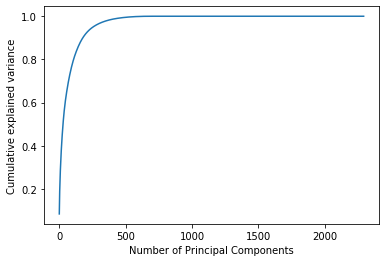

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance');

In [0]:
# Defining PCA with 250 components
pca = PCA(n_components=250)
# Fitting the PCA on the training set
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=250, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# Transforming training set and test set
X_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [0]:
print("original shape of Training set:   ", X_train.shape)
print("original shape of Test set:   ", X_test.shape)
print("Transformed shape of training set:", X_pca.shape)
print("Transformed shape of test set:", X_test_pca.shape)

original shape of Training set:    (2295, 77900)
original shape of Test set:    (984, 77900)
Transformed shape of training set: (2295, 250)
Transformed shape of test set: (984, 250)


In [0]:
from sklearn.linear_model import LogisticRegression
import time

pcaModel = LogisticRegression()

t0 = time.time()
pcaModel.fit(X_pca, y_train)
t1 = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print("Total training time:", round(t1-t0, 3), "s")

Total training time: 0.293 s


In [0]:
# Predicting with the pca model
pred = pcaModel.predict(X_test_pca)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(pcaModel.score(X_test_pca, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.98


In [0]:
# Generating confusion matrix
from sklearn.metrics import confusion_matrix

confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[114  12]
 [  9 849]]


In [0]:
from sklearn.metrics import classification_report
# Getting the Classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ad.       0.93      0.90      0.92       126
      nonad.       0.99      0.99      0.99       858

    accuracy                           0.98       984
   macro avg       0.96      0.95      0.95       984
weighted avg       0.98      0.98      0.98       984

